In [1]:
import pandas as pd
df=pd.read_csv("/home/saswata/data_science/project_2/AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [2]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


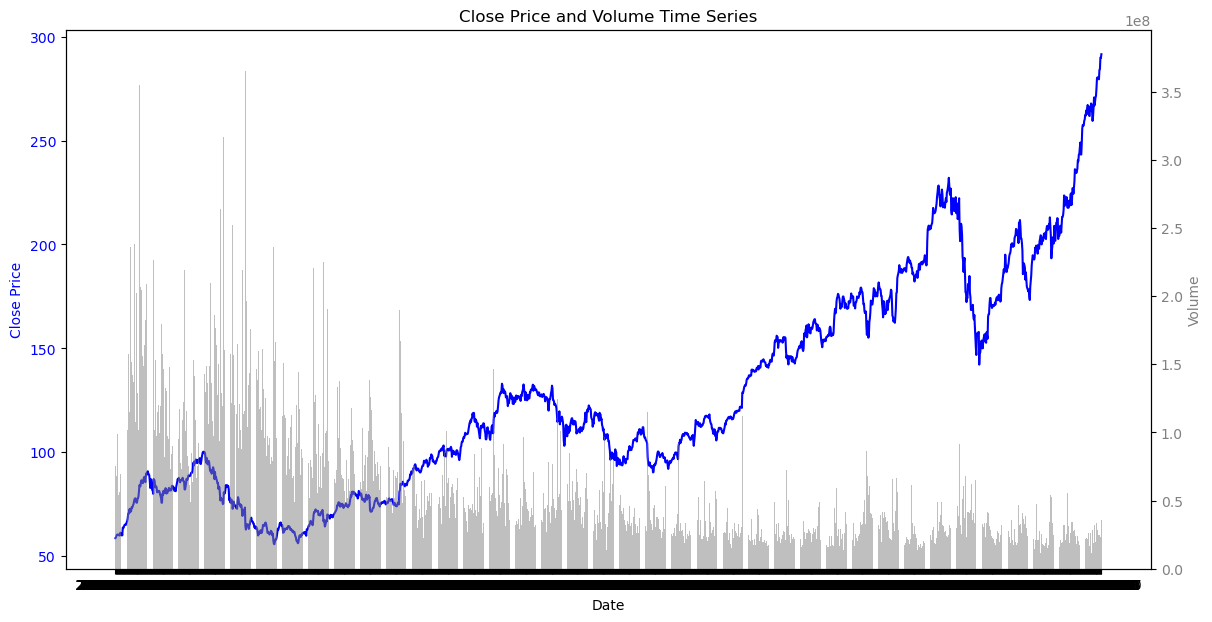

In [4]:
import matplotlib.pyplot as plt

# Plot the Volume column and Close column
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Close price
ax1.plot(df['Date'], df['Close'], label='Close', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Volume on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(df['Date'], df['Volume'], label='Volume', color='gray', alpha=0.5)
ax2.set_ylabel('Volume', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

plt.title('Close Price and Volume Time Series')
plt.show()

/home/saswata/miniconda3/envs/myenv/lib/python3.11/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


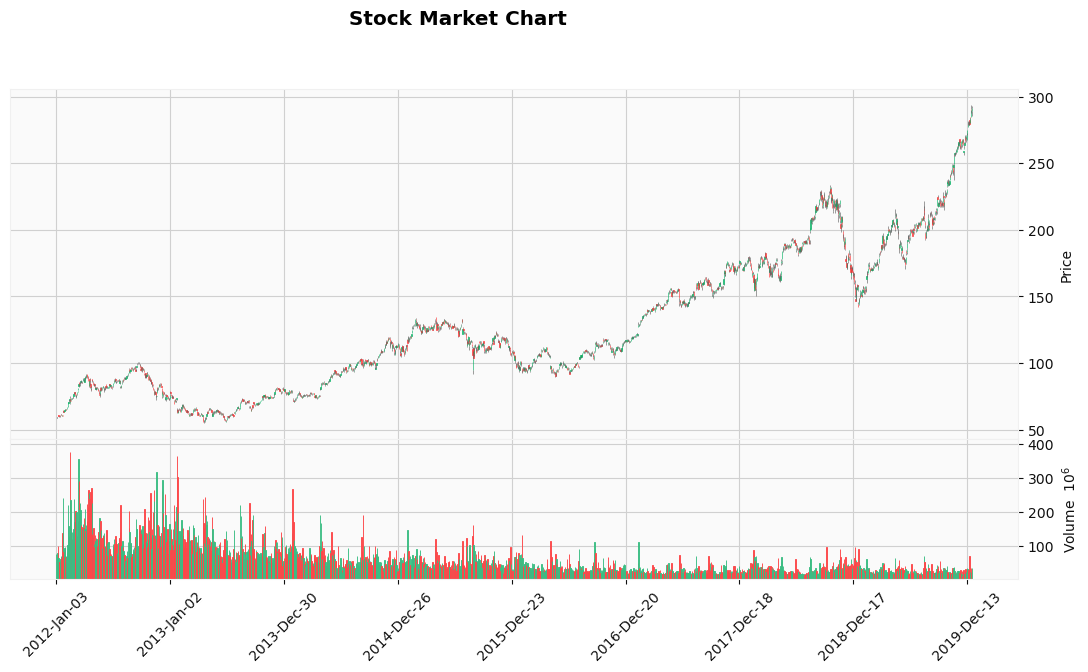

In [5]:
import mplfinance as mpf

# Ensure Date is in datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Create stock-market chart
mpf.plot(df, type='candle', volume=True, figsize=(14, 7), title='Stock Market Chart', style='yahoo')


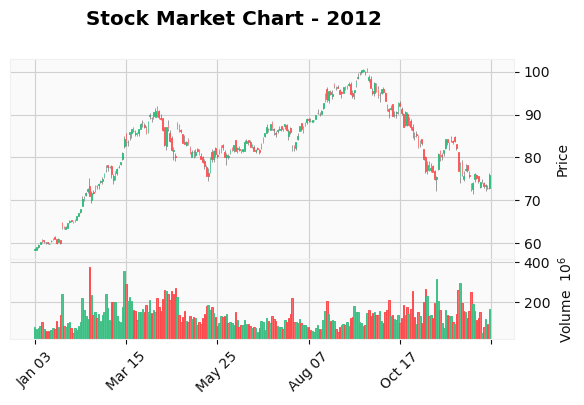

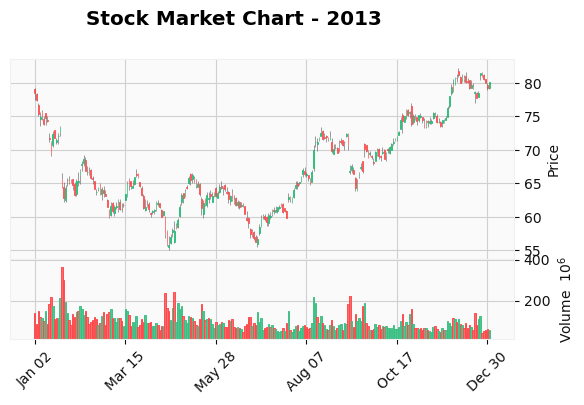

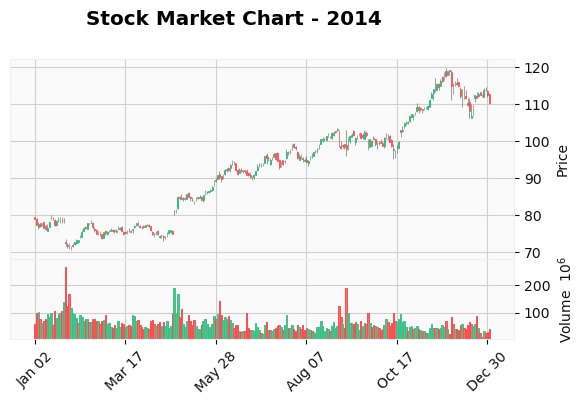

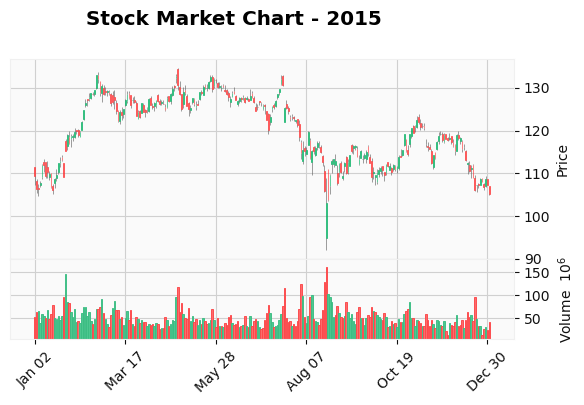

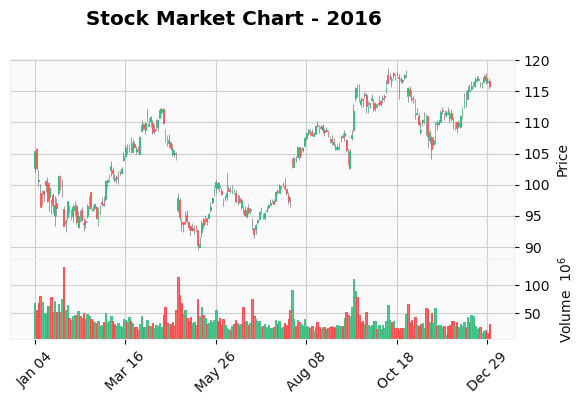

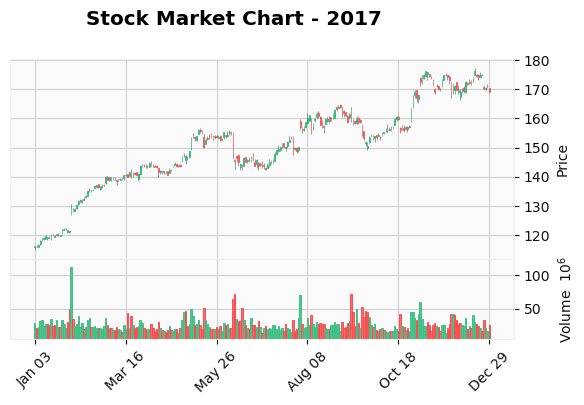

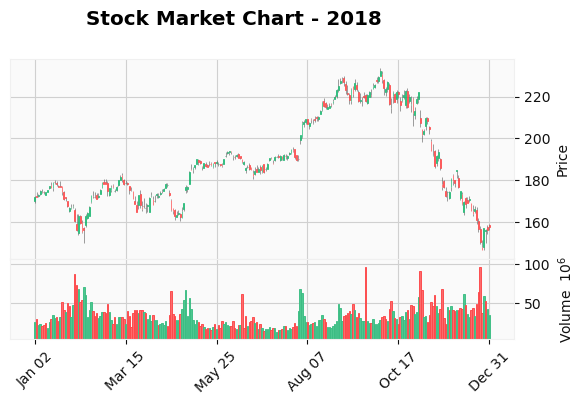

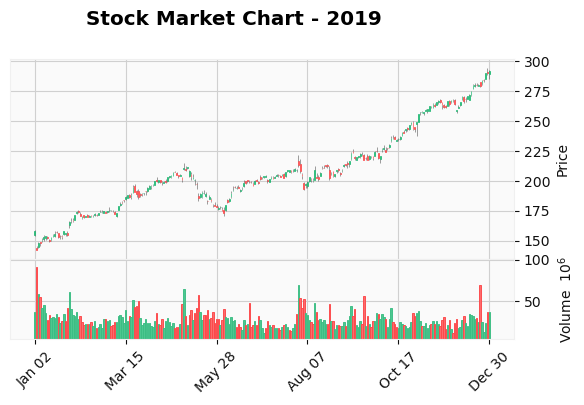

In [8]:
import mplfinance as mpf

# Ensure Date is in datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Group data by year
years = df.index.year.unique()

# Loop through each year and create a plot
for year in years:
    df_year = df[df.index.year == year]  # Filter data for the specific year
    
    # Create the plot for the year
    mpf.plot(
        df_year,
        type='candle',
        volume=True,
        figsize=(7, 4),
        title=f'Stock Market Chart - {year}',
        style='yahoo'
    )


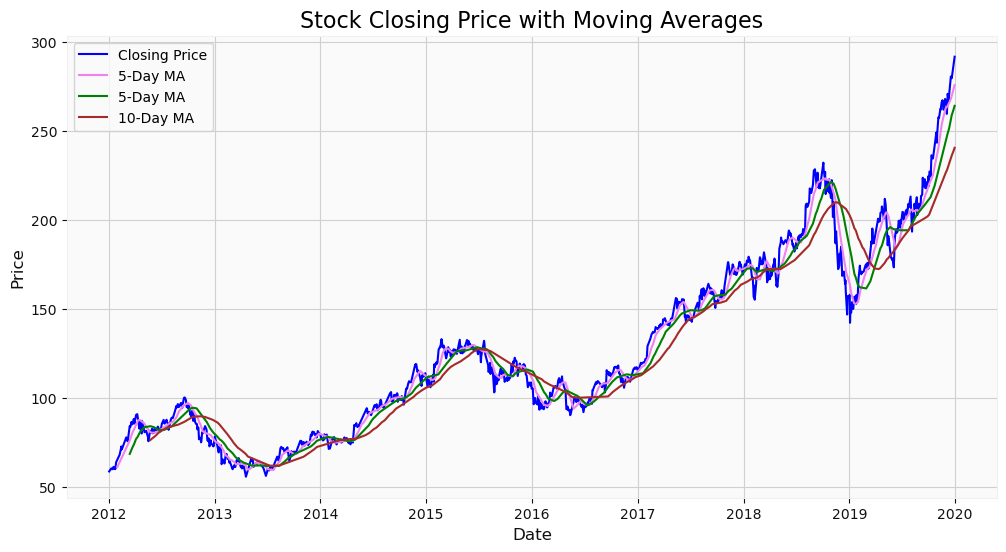

In [10]:
# Calculate moving averages- 20day, 50day, 100day
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA100'] = df['Close'].rolling(window=100).mean()

# Plot the moving averages
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['MA20'], label='5-Day MA', color='violet')
plt.plot(df['MA50'], label='5-Day MA', color='green')
plt.plot(df['MA100'], label='10-Day MA', color='brown')

plt.title('Stock Closing Price with Moving Averages', fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import pandas as pd
import calendar

# Load Data
df = pd.read_csv("/home/saswata/data_science/project_2/AAPL.csv", parse_dates=['Date'])
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Create full date range
start_date = df['Date'].min()
end_date = df['Date'].max()
full_date_range = pd.date_range(start=start_date, end=end_date)

# Reindex to ensure all dates exist
df = df.set_index('Date').reindex(full_date_range)

# Forward fill all missing values
df.iloc[:, :] = df.iloc[:, :].ffill()

# Reset index and save to an intermediate file
df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)
df.to_csv("/home/saswata/data_science/project_2/temp_filled_AAPL.csv", index=False)

In [3]:
# --- STEP 2: Reload and apply bfill only to Jan 1 & 2, 2012 ---
df = pd.read_csv("/home/saswata/data_science/project_2/temp_filled_AAPL.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Apply bfill only to January 1 & 2, 2012
jan_2012_mask = (df.index.year == 2012) & (df.index.month == 1) & (df.index.day <= 2)
df.loc[jan_2012_mask, :] = df.loc[jan_2012_mask, :].bfill(limit=2)

# Save final cleaned file
df.reset_index(inplace=True)
df.to_excel("/home/saswata/data_science/project_2/filled_AAPL.xlsx", index=False)

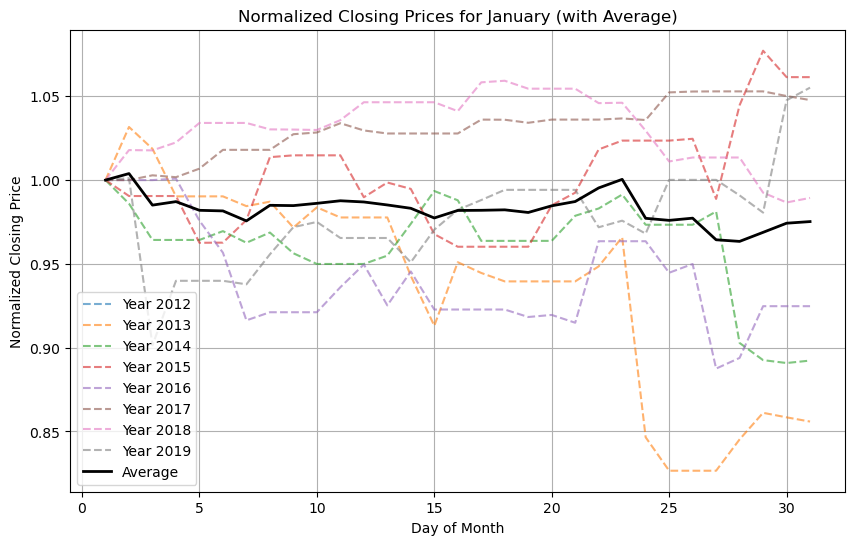

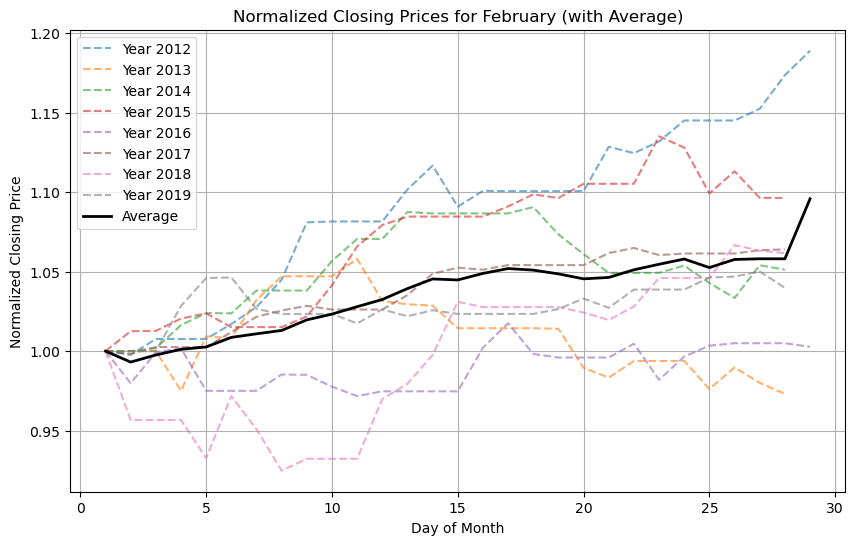

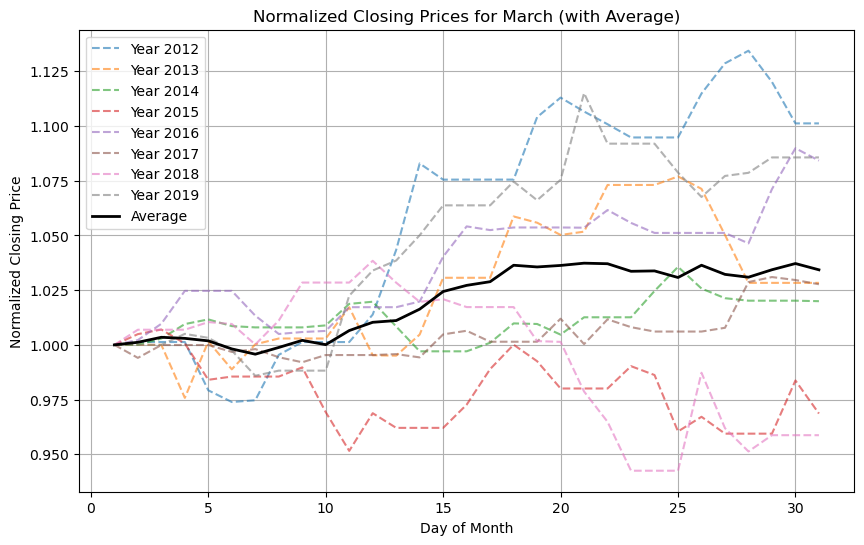

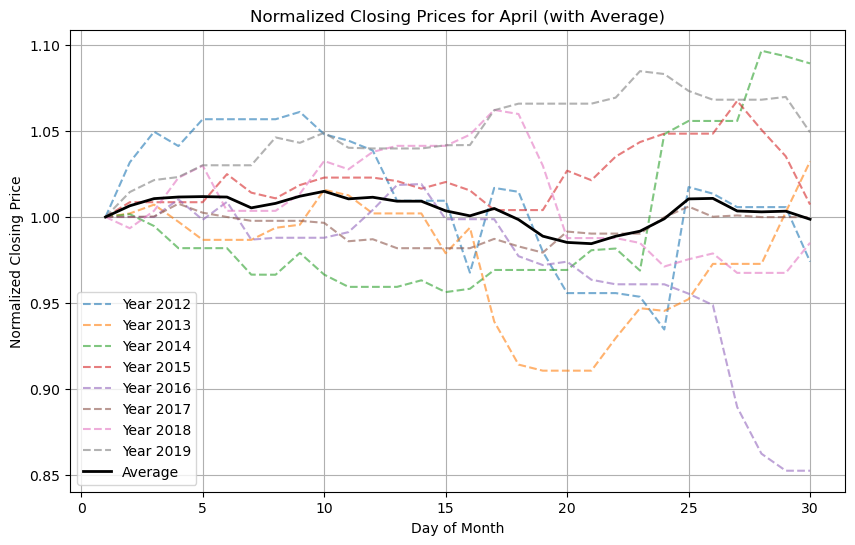

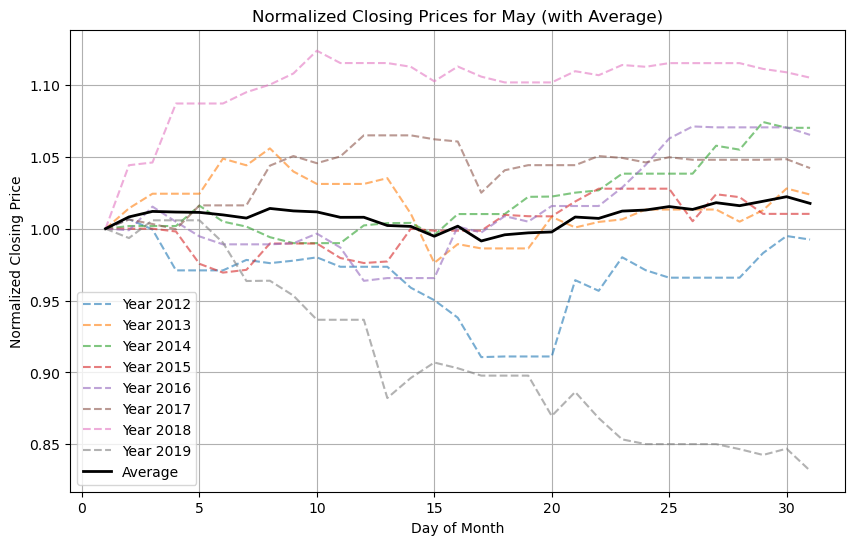

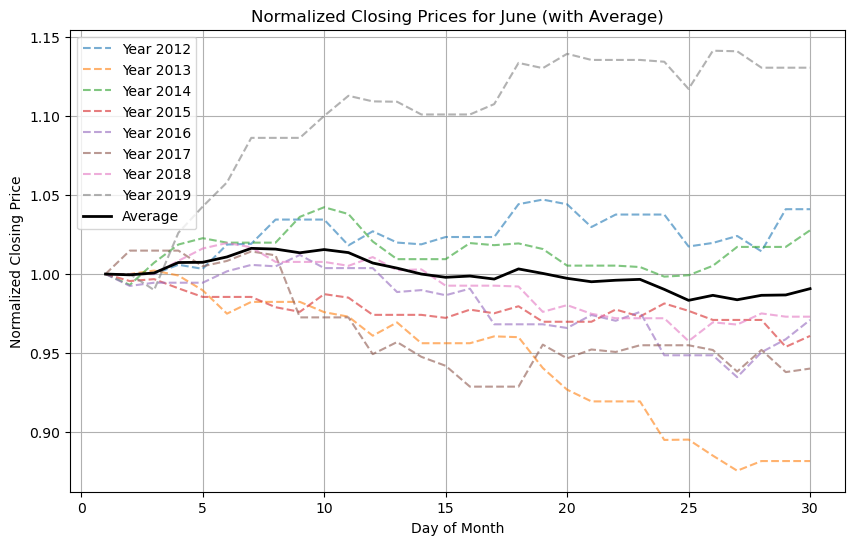

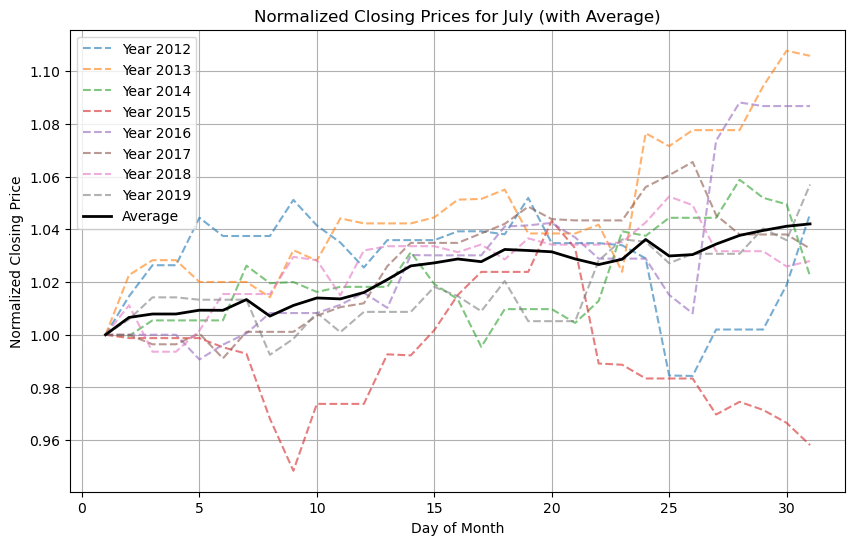

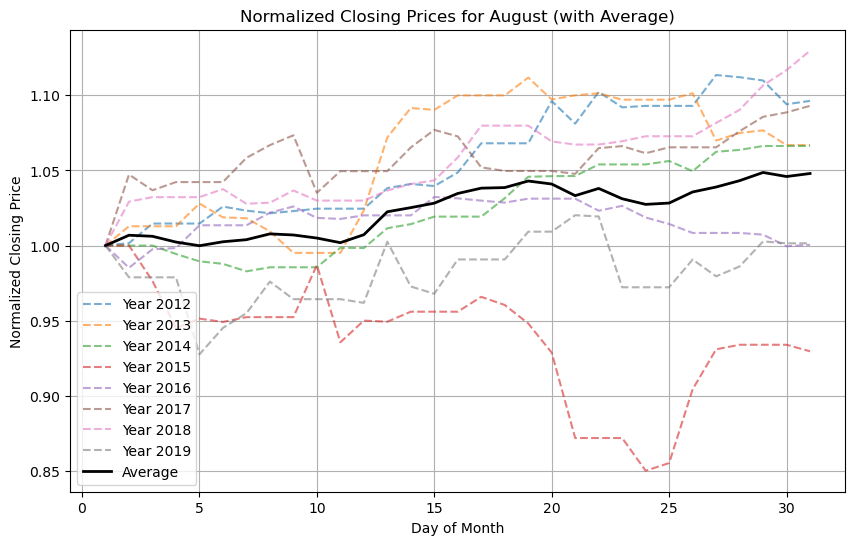

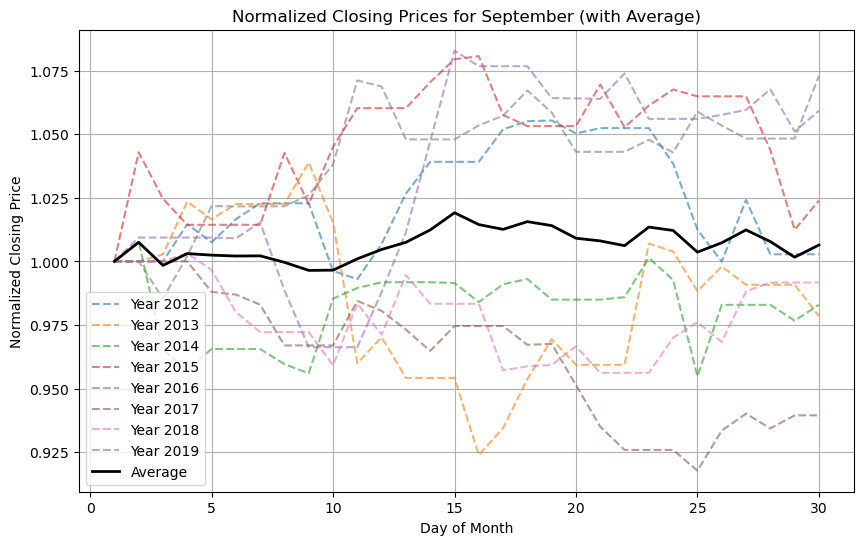

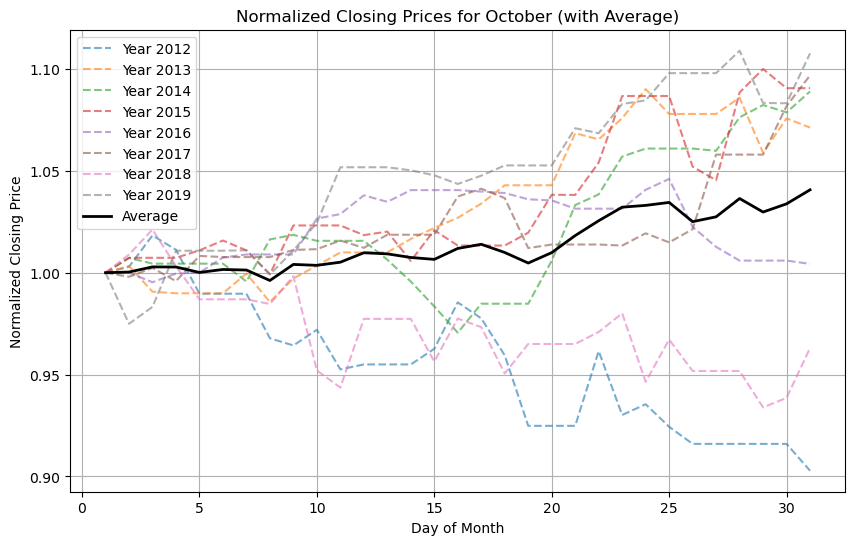

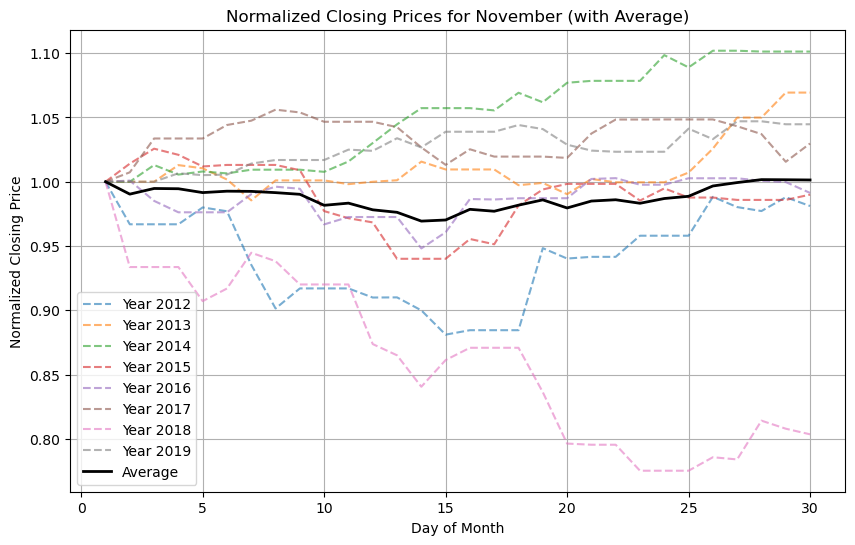

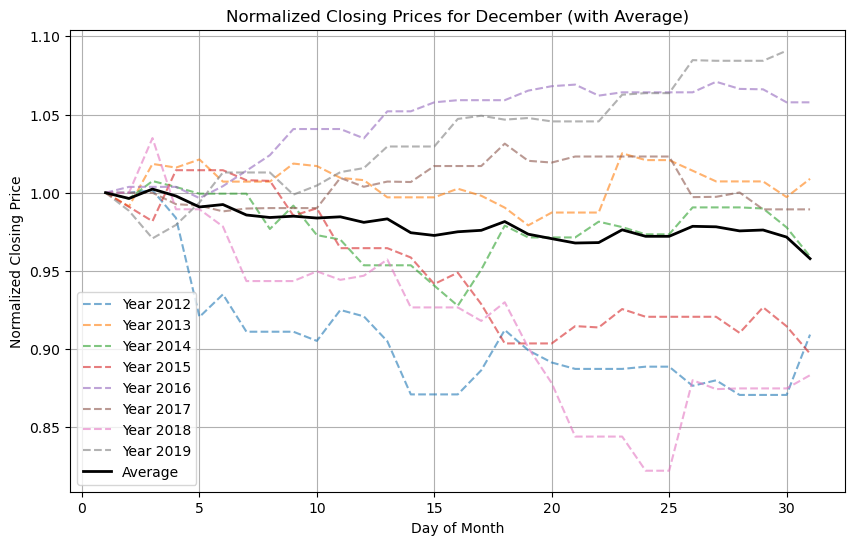

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load your data
df = pd.read_excel("/home/saswata/data_science/project_2/filled_AAPL.xlsx", parse_dates=['Date'])
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day for easier handling
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Define the number of days for each month
days_in_month = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30,
                 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}

# Function to normalize and fill data for a month
def normalize_monthly_data(df, month):
    monthly_data = []
    
    for year in sorted(df['Year'].unique()):
        # Filter data for the specific month and year
        year_month_data = df[(df['Year'] == year) & (df['Month'] == month)]
        
        # Generate a full range for the month
        days_in_month_count = days_in_month[month]
        if month == 2 and (year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)):
            days_in_month_count = 29
        
        days_range = pd.date_range(start=f'{year}-{month:02d}-01',
                                   end=f'{year}-{month:02d}-{days_in_month_count}')
        
        # Reindex data
        year_month_data = year_month_data.set_index('Date').reindex(days_range)
        
        # Normalize Close prices by dividing by the first day of the month
        if not year_month_data['Close'].isna().all():  # Ensure there are valid values
            year_month_data['Normalized'] = year_month_data['Close'] / year_month_data['Close'].iloc[0]
            monthly_data.append(year_month_data['Normalized'].values)
        else:
            print(f"All values are NaN for {calendar.month_name[month]} {year}. Skipping normalization.")
    
    return monthly_data

# Process all 12 months
all_months_data = {}
all_months_averages = {}

for month in range(1, 13):
    normalized_data = normalize_monthly_data(df, month)
    if normalized_data:  # Check if data is available for the month
        average_normalized = pd.DataFrame(normalized_data).mean(axis=0)  # Calculate average
        all_months_data[month] = normalized_data
        all_months_averages[month] = average_normalized

# Plot normalized data for each month
for month in range(1, 13):
    plt.figure(figsize=(10, 6))
    
    # Plot each year's data
    for i, year_data in enumerate(all_months_data[month]):
        plt.plot(range(1, len(year_data) + 1), year_data, 
                 label=f'Year {sorted(df["Year"].unique())[i]}', linestyle='--', alpha=0.6)
    
    # Plot the average
    plt.plot(range(1, len(all_months_averages[month]) + 1), all_months_averages[month], 
             label='Average', color='black', linewidth=2)
    
    # Add title and labels
    month_name = calendar.month_name[month]  # Get the month name
    plt.title(f'Normalized Closing Prices for {month_name} (with Average)')
    plt.xlabel('Day of Month')
    plt.ylabel('Normalized Closing Price')
    plt.legend()
    plt.grid()
    plt.show()